# Coronavirus Infected Lung Diagnosis

#### Project Desription: 
#### Datasets: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

### Importing Libraries

In [1]:
from pathlib import Path
import numpy as np
import os

import seaborn as sns
import random
import numpy as np 
import pandas as pd 
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import tensorflow as tf

# Import Image Path

In [2]:
paths_normal = []
paths_pneumonia = []

import os
for dirname, _, filenames in os.walk("./void_chestxray-ds/train/NORMAL/"):
    for filename in filenames:
        paths_normal.append(os.path.join(dirname, filename))
    
import os
for dirname, _, filenames in os.walk("./void_chestxray-ds/train/PNEUMONIA/"):
    for filename in filenames:
        paths_pneumonia.append(os.path.join(dirname, filename))

# Data Preprocessing

First We do some labelling and put the data in Dataframe

In [3]:
# Labeling
label_normal = np.zeros((len(paths_normal),1))
label_pneumonia = np.ones((len(paths_pneumonia),1))
label = list(np.concatenate((label_normal,label_pneumonia),axis = 0));
paths = paths_normal + paths_pneumonia

In [4]:
# data frame to put them together (paths and label)
d = {'paths': paths, 'label': label
    }
df = pd.DataFrame(data=d)

In [5]:
df.sample(5)

,paths,label
409,./void_chestxray-ds/train/NORMAL/IM-0505-0001-...,[0.0]
568,./void_chestxray-ds/train/NORMAL/NORMAL2-IM-06...,[0.0]
1516,./void_chestxray-ds/train/PNEUMONIA/person328_...,[1.0]
326,./void_chestxray-ds/train/NORMAL/IM-0359-0001....,[0.0]
1145,./void_chestxray-ds/train/PNEUMONIA/person328_...,[1.0]


# Importing and Resizing

In [6]:
# Resizing
IMAGE_HEIGHT = 244
IMAGE_WIDTH = 244

X = np.zeros((1,IMAGE_HEIGHT*IMAGE_WIDTH),np.uint8)
y = np.zeros((1,1),np.uint8)
for count,ele in enumerate (df.iloc[:,0],0): 
    y_temp = df.iloc[count,1]
    y = np.vstack((y,y_temp))
    X_temp = cv.imread(ele,cv.IMREAD_GRAYSCALE) 
    X_temp = cv.resize(X_temp,(IMAGE_HEIGHT,IMAGE_WIDTH)).reshape(1,IMAGE_HEIGHT*IMAGE_WIDTH)
    X = np.vstack((X,X_temp))
#     print("progression : %{}".format((count//len(df))*100))
#     if (count/len(df)*100) > 99.9 :
#         print("Done")
print('Done Importing image')
X = X[1:,:]
y = y[1:,:]

Done Importing image


In [7]:
print(len(X))
print(len(y))

2016
2016


### Splitting the dataset

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
len(X_train)

1612

In [10]:
len(X_val)

404

In [11]:
len(y_train)

1612

In [12]:
len(y_val)

404

### Data visualization

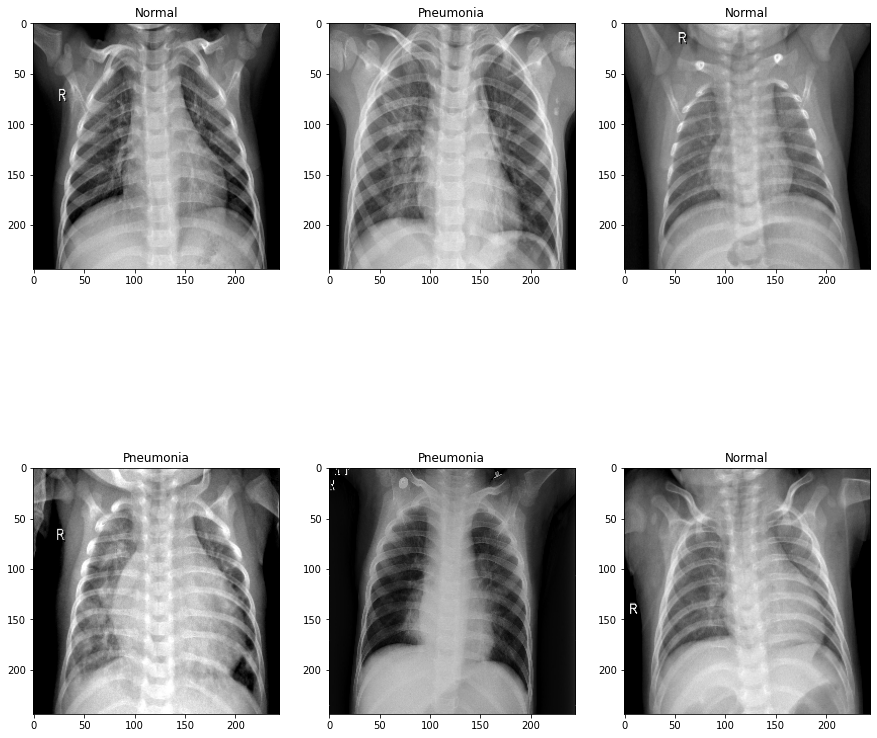

In [13]:
plt.figure(figsize=(15,15))
for count,i in enumerate(range(0,6),231):
    
    plt.subplot(count)
    if y_train[i]==1:
        plt.title("Pneumonia")
        plt.imshow(X_train[i,:].reshape(244,244),'gray')
        
    elif y_train[i]==0:
        plt.title("Normal")
        plt.imshow(X_train[i,:].reshape(244,244),'gray')
plt.show()  

# Normalizing

In [14]:
X_train,X_val = X_train[:,:]/255, X_val[:,:]/255

# Model Building

In [15]:
def VGG16():
    
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Conv2D(input_shape=(244,244,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units=4096,activation="relu"))
  model.add(tf.keras.layers.Dense(units=4096,activation="relu"))
  model.add(tf.keras.layers.Dense(units=2, activation="softmax"))

#   opt = Adam(lr=0.001)
  model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])

  model.summary()

    
  return model

In [17]:
#Initialising the CNN
def CNN():
    
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(244, 244, 1))) # Grey scale
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    #tf.keras.layers.Dropout(0.2)

    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(64, activation = "relu"))
    model.add(tf.keras.layers.Dense(32, activation = "relu"))
    model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Dense(2, activation = "softmax")) 
    model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    
    model.summary()    
    return model

In [18]:
# model.summary()

Now we need to choose loss function, optimizer and compile the model

In [19]:
# model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model = CNN()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 242, 242, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 121, 121, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 119, 119, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 59, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 57, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 207936)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

# Reshaping the Image Data

In [20]:
X_train = X_train.reshape(-1,244,244,1)
X_val = X_val.reshape(-1,244,244,1)
print(X_train.shape, X_val.shape)

(1612, 244, 244, 1) (404, 244, 244, 1)


Data augmentation - to make some rotation, zoom in, zoom out. it is important to avoid overfitting

In [21]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False)  


datagen.fit(X_train)

# Training Phase

In [22]:
BATCH_SIZE = 20

EPOCHS = 10

In [23]:
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=BATCH_SIZE),epochs = EPOCHS, validation_data = (X_val,y_val),verbose = 1,steps_per_epoch=len(X_train) // 20)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
80/80 [==============================] - 92s 1s/step - loss: 0.7561 - accuracy: 0.5754 - val_loss: 0.6211 - val_accuracy: 0.1287
Epoch 2/10
80/80 [==============================] - 88s 1s/step - loss: 0.4821 - accuracy: 0.5396 - val_loss: 0.4792 - val_accuracy: 0.5520
Epoch 3/10
80/80 [==============================] - 102s 1s/step - loss: 0.4131 - accuracy: 0.5471 - val_loss: 0.3989 - val_accuracy: 0.5446
Epoch 4/10
80/80 [==============================] - 101s 1s/step - loss: 0.3496 - accuracy: 0.5433 - val_loss: 0.2643 - val_accuracy: 0.5149
Epoch 5/10
80/80 [==============================] - 100s 1s/step - loss: 0.3180 - accuracy: 0.5245 - val_loss: 0.5069 - val_accuracy: 0.6807
Epoch 6/10
80/80 [==============================] - 93s 1s/step - loss: 0.2881 - accuracy: 0.5138 - val_loss: 0.1910 - val_accuracy: 0.5347
Epoch 7/10
80/80 [==============================] - 93s 1s/step - loss: 0.2672 - 

In [24]:
# model.fit_generator(datagen.flow(X_train,y_train, batch_size=BATCH_SIZE),epochs = EPOCHS, validation_data = (X_test,y_test),verbose = 1,steps_per_epoch=len(X_train) // 20)

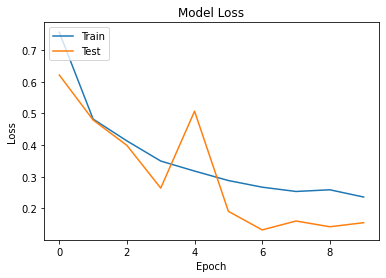

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

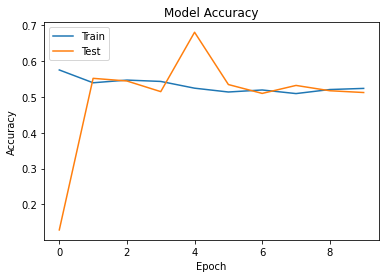

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Saving the model for inference later

In [27]:
model.save("ClassificationModelWithCNN_1.h5")

# Evaluate the result on training and validation set

Training set

0.9491315136476427


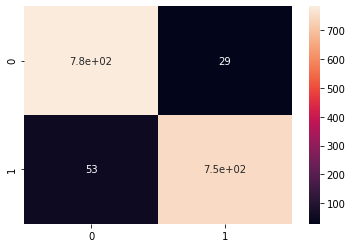

In [28]:
classifier_training = model.predict(X_train)
predicted_training =[]
for index, val in enumerate(classifier_training):
    if(classifier_training[index][0] > classifier_training[index][1]):
        predicted_training.append(0)
    else:
        predicted_training.append(1)
    

confusion_matrix(y_train, predicted_training)
print(accuracy_score(y_train, predicted_training))
cm_model_training = confusion_matrix(y_train, predicted_training)
sns.heatmap(cm_model_training, annot=True) ;

In [29]:
confusion_matrix(y_train, predicted_training)

array([[782,  29],
       [ 53, 748]])

Validation Set

0.9554455445544554


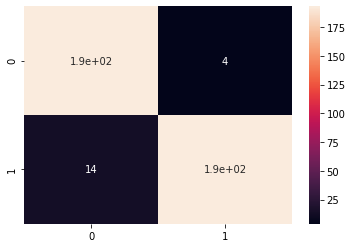

In [30]:
classifier_testing = model.predict(X_val)
predicted_testing =[]
for index, val in enumerate(classifier_testing):
    if(classifier_testing[index][0] > classifier_testing[index][1]):
        predicted_testing.append(0)
    else:
        predicted_testing.append(1)
    
confusion_matrix(y_val, predicted_testing)
print(accuracy_score(y_val, predicted_testing))
cm_model_testing = confusion_matrix(y_val, predicted_testing)
sns.heatmap(cm_model_testing, annot=True) ;

In [31]:
confusion_matrix(y_val, predicted_testing)

array([[193,   4],
       [ 14, 193]])

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_val, predicted_testing))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96       197
         1.0       0.98      0.93      0.96       207

    accuracy                           0.96       404
   macro avg       0.96      0.96      0.96       404
weighted avg       0.96      0.96      0.96       404



# Inference

In [39]:
from pathlib import Path
data_dir=os.path.join(Path.home(),'Desktop','skymindBootcamp','AI-thon','void_chestxray-ds', 'test')

In [40]:
def parse_img(img):
    # load the raw data from the file as a string
    img = tf.io.read_file(img)
    # convert the compressed string to a 3D uint8 tensor
    img = tf.image.decode_jpeg(img, channels=1)
    # Use `convert_image_dtype` to convert to floats in the [0,1] range.
    img = tf.image.convert_image_dtype(img, tf.float32)
    # resize the image to the desired size.
    return tf.image.resize(img, [244, 244])

In [41]:
inference_image_1 = os.path.join(data_dir, 'NORMAL', 'IM-0022-0001.jpeg')
inference_image_2 = os.path.join(data_dir, 'PNEUMONIA', 'person54_virus_109.jpeg')
inference_image_3 = os.path.join(data_dir, 'NORMAL', 'IM-0063-0001.jpeg')
inference_image_4 = os.path.join(data_dir, 'PNEUMONIA', 'person80_bacteria_392.jpeg')

test_image_1 = parse_img(inference_image_1)
test_image_2 = parse_img(inference_image_2)
test_image_3 = parse_img(inference_image_3)
test_image_4 = parse_img(inference_image_4)


In [42]:
prediction_score_1 = model.predict(np.expand_dims(test_image_1, 0))
prediction_score_2 = model.predict(np.expand_dims(test_image_2, 0))
prediction_score_3 = model.predict(np.expand_dims(test_image_3, 0))
prediction_score_4 = model.predict(np.expand_dims(test_image_4, 0))

In [43]:
prediction_score_1

array([[0.08626217, 0.9137378 ]], dtype=float32)

In [44]:
prediction_score_2

array([[0.32317272, 0.67682725]], dtype=float32)

In [45]:
prediction_score_3

array([[0.99139154, 0.00860841]], dtype=float32)

In [46]:
prediction_score_4

array([[0.01588211, 0.98411787]], dtype=float32)

In [47]:
prediction_score_4[0][0]

0.015882114